In [70]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import seaborn as sns


In [72]:
weather_data = pd.read_csv('jena_climate_2009_2016.csv')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [73]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [75]:
weather_data['date_time'] = pd.to_datetime(weather_data['Date Time'], format='%d.%m.%Y %H:%M:%S')
weather_data.drop(['Date Time'], axis = 1, inplace = True)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
date_time          420551 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(14)
memory usage: 48.1 MB


In [76]:
weather_data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),date_time
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009-01-01 00:10:00
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009-01-01 00:20:00
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009-01-01 00:30:00
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009-01-01 00:40:00
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009-01-01 00:50:00


In [77]:
weather_data.drop_duplicates(keep = 'first', inplace  = True)

In [78]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420224 entries, 0 to 420550
Data columns (total 15 columns):
p (mbar)           420224 non-null float64
T (degC)           420224 non-null float64
Tpot (K)           420224 non-null float64
Tdew (degC)        420224 non-null float64
rh (%)             420224 non-null float64
VPmax (mbar)       420224 non-null float64
VPact (mbar)       420224 non-null float64
VPdef (mbar)       420224 non-null float64
sh (g/kg)          420224 non-null float64
H2OC (mmol/mol)    420224 non-null float64
rho (g/m**3)       420224 non-null float64
wv (m/s)           420224 non-null float64
max. wv (m/s)      420224 non-null float64
wd (deg)           420224 non-null float64
date_time          420224 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(14)
memory usage: 51.3 MB


In [83]:
weather_data['date_time'].duplicated().any()

False

In [96]:
def scatter_function(x_values, y_values, title, x_label, y_label):
    plt.figure(figsize=(10,8))
    ax = sns.scatterplot(x_values, y_values, color = 'orchid')
    ax.set_xlim(x_values.min(), x_values.max())
    ax.set_ylim(y_values.min(), y_values.max())
    plt.title(title, fontsize = 18)
    plt.xticks(rotation = 45, fontsize = 14, horizontalalignment="right")
    plt.xlabel(x_label, fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.ylabel(y_label, fontsize = 18)
    plt.tight_layout()

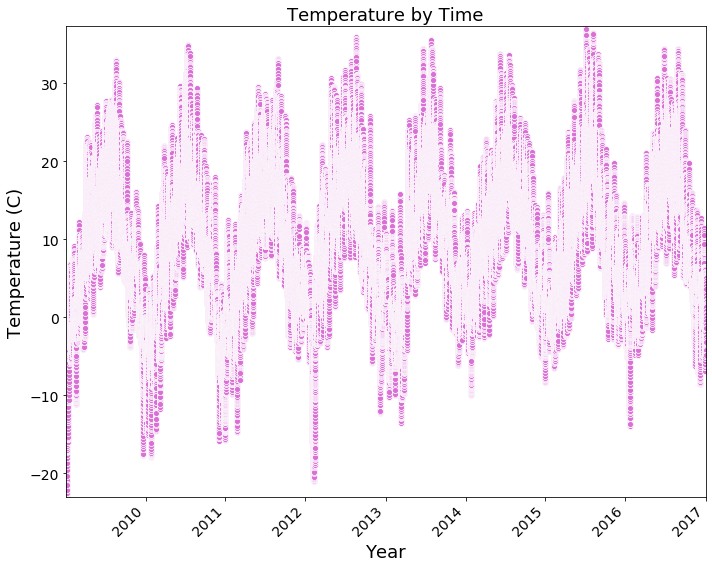

In [97]:
scatter_function(weather_data['date_time'], weather_data['T (degC)'], 'Temperature by Time', 'Year', 'Temperature (C)')


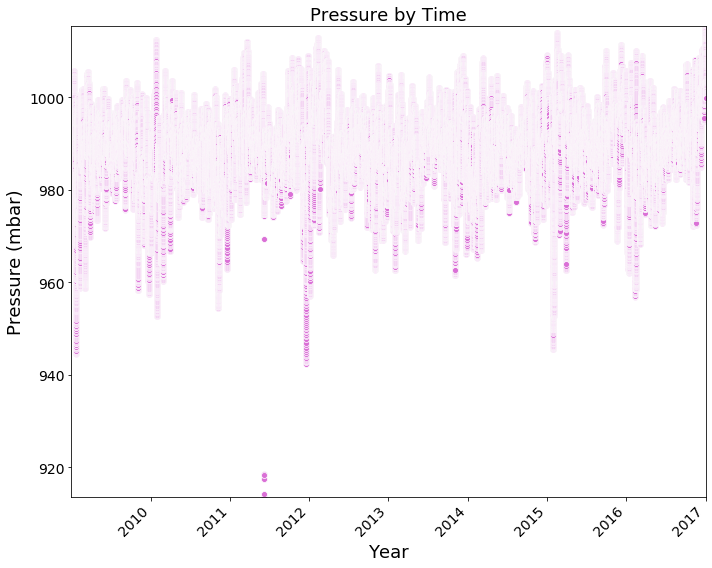

In [99]:
scatter_function(weather_data['date_time'], weather_data['p (mbar)'], 'Pressure by Time', 'Year', 'Pressure (mbar)')


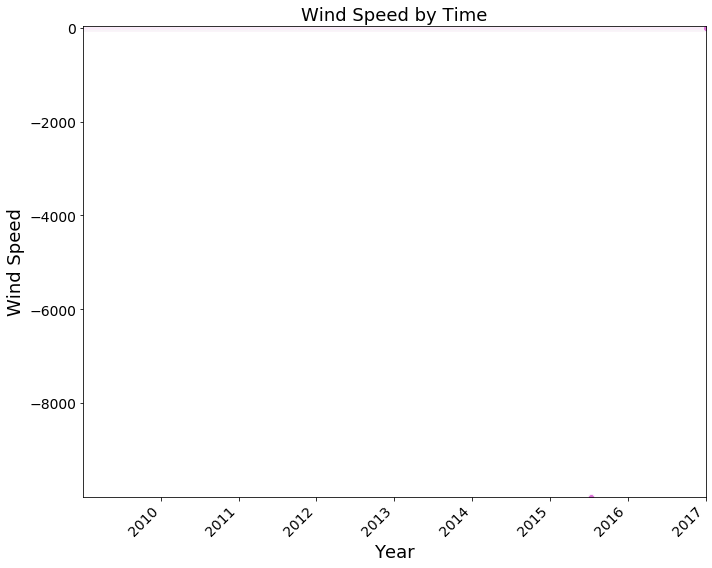

In [103]:
scatter_function(weather_data['date_time'], weather_data['wv (m/s)'], 'Wind Speed by Time', 'Year', 'Wind Speed')


In [104]:
weather_data['wv (m/s)'].min()

-9999.0

In [105]:
weather_data.loc[weather_data['wv (m/s)'] == -9999.0]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),date_time
343578,990.49,16.85,290.80,12.78,76.90,19.22,14.78,4.44,9.34,14.92,1183.06,-9999.0,-9999.0,359.7,2015-07-13 09:10:00
343579,990.32,17.06,291.03,12.86,76.30,19.48,14.86,4.62,9.39,15.01,1181.97,-9999.0,-9999.0,359.8,2015-07-13 09:20:00
343580,990.24,17.43,291.41,12.75,74.00,19.94,14.76,5.19,9.32,14.90,1180.42,-9999.0,-9999.0,359.8,2015-07-13 09:30:00
343581,990.27,17.71,291.68,12.88,73.30,20.30,14.88,5.42,9.40,15.02,1179.26,-9999.0,-9999.0,359.8,2015-07-13 09:40:00
343582,990.28,17.76,291.73,13.03,73.80,20.36,15.03,5.33,9.49,15.17,1179.00,-9999.0,-9999.0,359.8,2015-07-13 09:50:00
343583,990.20,17.98,291.96,12.74,71.40,20.65,14.74,5.90,9.31,14.89,1178.14,-9999.0,-9999.0,359.8,2015-07-13 10:00:00
343584,990.17,18.19,292.17,12.59,69.78,20.92,14.60,6.32,9.22,14.74,1177.32,-9999.0,-9999.0,359.8,2015-07-13 10:10:00
343585,990.07,18.31,292.30,12.97,71.00,21.08,14.97,6.11,9.46,15.12,1176.55,-9999.0,-9999.0,359.8,2015-07-13 10:20:00
343586,990.02,18.24,292.24,12.88,70.90,20.99,14.88,6.11,9.40,15.03,1176.82,-9999.0,-9999.0,359.8,2015-07-13 10:30:00
343587,989.96,18.36,292.36,12.76,69.84,21.14,14.77,6.38,9.33,14.92,1176.31,-9999.0,-9999.0,359.8,2015-07-13 10:40:00


In [117]:
before_missing_wind = weather_data.loc[(weather_data['date_time'] > '2015-07-10 09:00:00') & (weather_data['date_time'] < '2015-07-13 09:00:00')]
before_missing_wind.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 343146 to 343576
Data columns (total 15 columns):
p (mbar)           431 non-null float64
T (degC)           431 non-null float64
Tpot (K)           431 non-null float64
Tdew (degC)        431 non-null float64
rh (%)             431 non-null float64
VPmax (mbar)       431 non-null float64
VPact (mbar)       431 non-null float64
VPdef (mbar)       431 non-null float64
sh (g/kg)          431 non-null float64
H2OC (mmol/mol)    431 non-null float64
rho (g/m**3)       431 non-null float64
wv (m/s)           431 non-null float64
max. wv (m/s)      431 non-null float64
wd (deg)           431 non-null float64
date_time          431 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(14)
memory usage: 53.9 KB


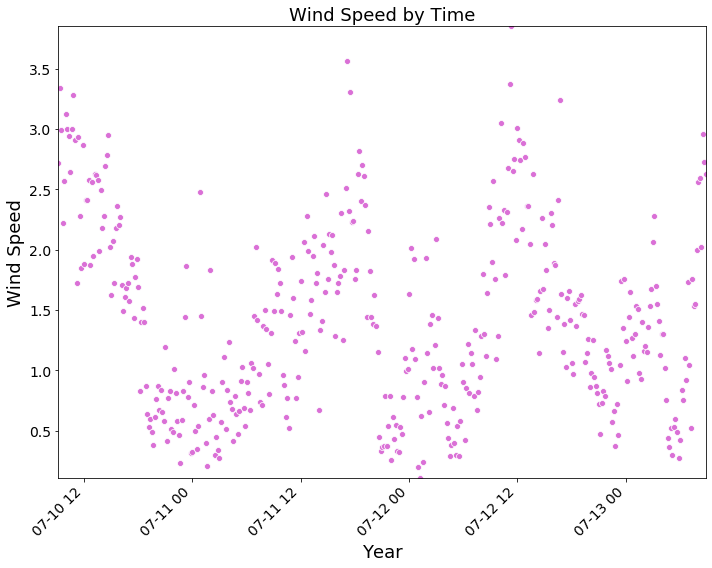

In [118]:
scatter_function(before_missing_wind['date_time'], before_missing_wind['wv (m/s)'], 'Wind Speed by Time', 'Year', 'Wind Speed')



In [119]:
after_missing_wind = weather_data.loc[(weather_data['date_time'] > '2015-07-13 12:10:00') & (weather_data['date_time'] < '2015-07-16 12:10:00')]
after_missing_wind.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 343597 to 344027
Data columns (total 15 columns):
p (mbar)           431 non-null float64
T (degC)           431 non-null float64
Tpot (K)           431 non-null float64
Tdew (degC)        431 non-null float64
rh (%)             431 non-null float64
VPmax (mbar)       431 non-null float64
VPact (mbar)       431 non-null float64
VPdef (mbar)       431 non-null float64
sh (g/kg)          431 non-null float64
H2OC (mmol/mol)    431 non-null float64
rho (g/m**3)       431 non-null float64
wv (m/s)           431 non-null float64
max. wv (m/s)      431 non-null float64
wd (deg)           431 non-null float64
date_time          431 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(14)
memory usage: 53.9 KB


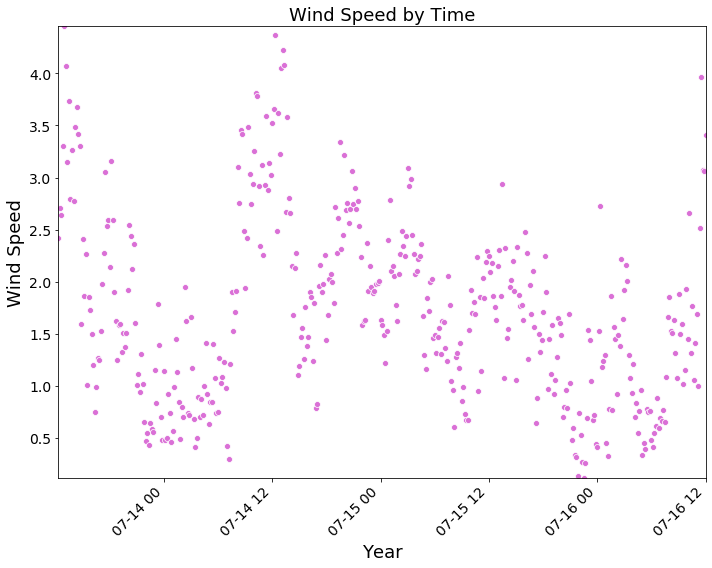

In [120]:
scatter_function(after_missing_wind['date_time'], after_missing_wind['wv (m/s)'], 'Wind Speed by Time', 'Year', 'Wind Speed')



In [123]:
missing_wind_day = weather_data.loc[(weather_data['date_time'] > '2015-07-13 07:00:00') & (weather_data['date_time'] < '2015-07-13 15:00:00')]
missing_wind_day



,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),date_time
343566,990.37,16.55,290.51,13.15,80.30,18.86,15.14,3.72,9.57,15.29,1183.98,0.52,1.56,123.1,2015-07-13 07:10:00
343567,990.40,16.60,290.56,12.87,78.60,18.92,14.87,4.05,9.39,15.02,1183.94,1.76,3.68,254.9,2015-07-13 07:20:00
343568,990.42,16.35,290.31,12.72,79.10,18.62,14.73,3.89,9.30,14.87,1185.05,1.53,2.76,245.9,2015-07-13 07:30:00
343569,990.39,16.31,290.27,12.82,79.80,18.57,14.82,3.75,9.36,14.97,1185.13,1.55,3.00,250.2,2015-07-13 07:40:00
343570,990.37,16.40,290.36,12.72,78.80,18.68,14.72,3.96,9.30,14.86,1184.79,2.00,3.32,230.9,2015-07-13 07:50:00
343571,990.40,16.46,290.42,12.64,78.10,18.75,14.65,4.11,9.25,14.79,1184.61,2.56,4.24,244.7,2015-07-13 08:00:00
343572,990.40,16.47,290.43,12.67,78.20,18.76,14.67,4.09,9.27,14.82,1184.56,2.59,4.72,248.2,2015-07-13 08:10:00
343573,990.45,16.63,290.59,12.78,78.00,18.96,14.79,4.17,9.34,14.93,1183.91,2.02,4.12,244.3,2015-07-13 08:20:00
343574,990.51,16.83,290.78,12.76,76.90,19.20,14.76,4.43,9.32,14.91,1183.18,2.96,4.40,248.6,2015-07-13 08:30:00
343575,990.51,16.93,290.88,12.82,76.70,19.32,14.82,4.50,9.36,14.96,1182.75,2.73,4.12,245.7,2015-07-13 08:40:00


In [124]:
missing_wind_day_2 = weather_data.loc[(weather_data['date_time'] > '2015-07-14 07:00:00') & (weather_data['date_time'] < '2015-07-14 15:00:00')]
missing_wind_day_2



,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),date_time
343710,988.10,17.11,291.27,15.14,88.20,19.54,17.24,2.31,10.92,17.44,1178.02,0.30,0.84,334.8,2015-07-14 07:10:00
343711,988.04,17.29,291.45,15.13,87.10,19.77,17.22,2.55,10.91,17.43,1177.23,1.21,3.22,207.5,2015-07-14 07:20:00
343712,988.10,17.37,291.53,15.17,86.90,19.87,17.26,2.60,10.94,17.47,1176.96,1.90,3.80,210.1,2015-07-14 07:30:00
343713,988.03,17.47,291.63,15.23,86.70,19.99,17.33,2.66,10.99,17.54,1176.44,1.53,3.36,221.5,2015-07-14 07:40:00
343714,987.99,17.47,291.64,15.23,86.70,19.99,17.33,2.66,10.99,17.54,1176.39,1.71,2.92,223.6,2015-07-14 07:50:00
343715,987.99,17.55,291.72,15.31,86.70,20.09,17.42,2.67,11.04,17.63,1176.02,1.91,4.24,225.1,2015-07-14 08:00:00
343716,988.02,17.66,291.82,15.27,85.90,20.23,17.38,2.85,11.02,17.59,1175.63,3.10,4.88,214.3,2015-07-14 08:10:00
343717,988.01,17.80,291.97,15.34,85.50,20.41,17.45,2.96,11.06,17.67,1175.02,2.76,4.68,213.6,2015-07-14 08:20:00
343718,988.00,17.82,291.99,15.36,85.50,20.44,17.48,2.96,11.08,17.69,1174.92,3.46,5.06,209.6,2015-07-14 08:30:00
343719,988.00,17.93,292.10,15.34,84.80,20.58,17.45,3.13,11.06,17.66,1174.49,3.42,4.96,213.3,2015-07-14 08:40:00
